In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [40]:
dataset = 'Attaques.csv'
data = pd.read_csv(dataset, delimiter=';', encoding='ISO-8859-1')

In [41]:
print(data)

    Adresse-IP-source  Details-IP-Source  \
0         187.10.21.11            Brazil   
1         187.10.21.12            Taiwan   
2         187.10.21.13     United States   
3         187.10.21.13       South Korea   
4         187.10.21.14       South Korea   
..                 ...               ...   
563         124.04.283              Bali   
564         124.04.284              Bali   
565         124.04.285              Bali   
566         124.04.286              Bali   
567         124.04.287              Bali   

                        Reputation-IP-source Adresse-IP-destination   \
0       Adresse dote d'une bonne rputation             41.37.17.73   
1    Adresse dote d'une mauvaise rputation             41.37.17.73   
2    Adresse dote d'une mauvaise rputation             41.37.17.73   
3    Adresse dote d'une mauvaise rputation             41.37.17.73   
4    Adresse dote d'une mauvaise rputation             41.37.17.73   
..                                     

In [42]:
selected_columns = ['Details-IP-Source', 'Reputation-IP-source','Details-IP-Destination/Geolocalisation', 'Nom-utilisateur','Date-detection-comportement','Signature','Occurrence','Description-comportement/Analyse','Type-Attaque','Type-comportement']
selected_data = data[selected_columns]

In [43]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
for column in selected_data.columns:
    if selected_data[column].dtype == object:
        selected_data[column] = label_encoder.fit_transform(selected_data[column].astype(str))

C:\Users\SETUPG~1\AppData\Local\Temp/ipykernel_25240/1637544696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = label_encoder.fit_transform(selected_data[column].astype(str))
C:\Users\SETUPG~1\AppData\Local\Temp/ipykernel_25240/1637544696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = label_encoder.fit_transform(selected_data[column].astype(str))
C:\Users\SETUPG~1\AppData\Local\Temp/ipykernel_25240/1637544696.py:5: SettingWithCopyWarning: 
A value is 

In [66]:
# Calculate the correlation matrix
corr_matrix = selected_data.corr()

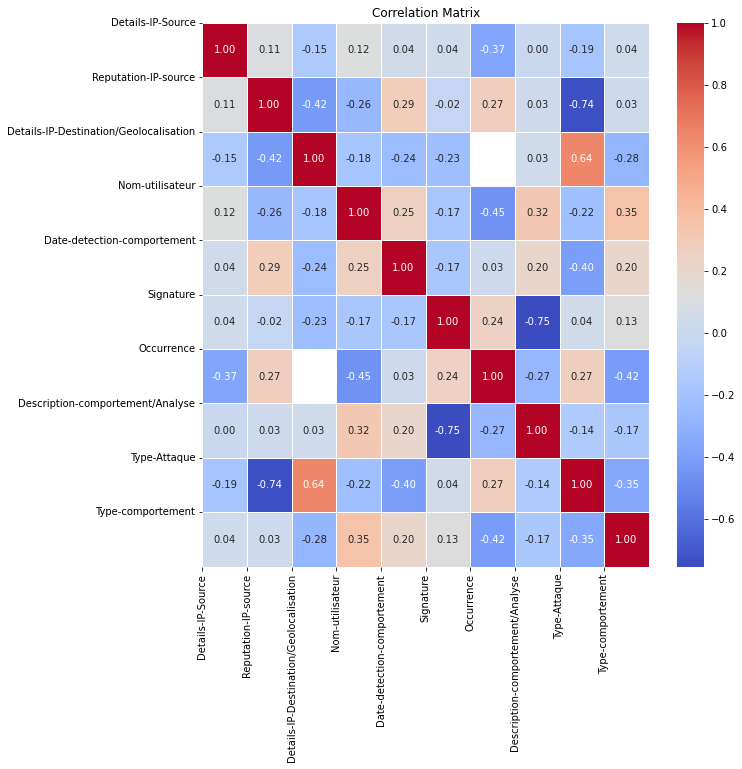

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(np.arange(len(selected_data.columns)), selected_data.columns, rotation=90)
plt.yticks(np.arange(len(selected_data.columns)), selected_data.columns)
plt.title('Correlation Matrix')
plt.show()


In [78]:
# Prepare the data for training

X = data.drop(['Type-comportement'], axis=1)  
y = data['Type-comportement'] 

In [79]:
# Encode categorical variables


encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

In [80]:
# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [92]:
# Create the decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=3)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [93]:
# Train the classifier

classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [94]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [95]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7982456140350878


In [96]:
feature_importances = DecisionTreeClassifier.feature_importances_

C:\Users\SETUP GAME\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SETUP GAME\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


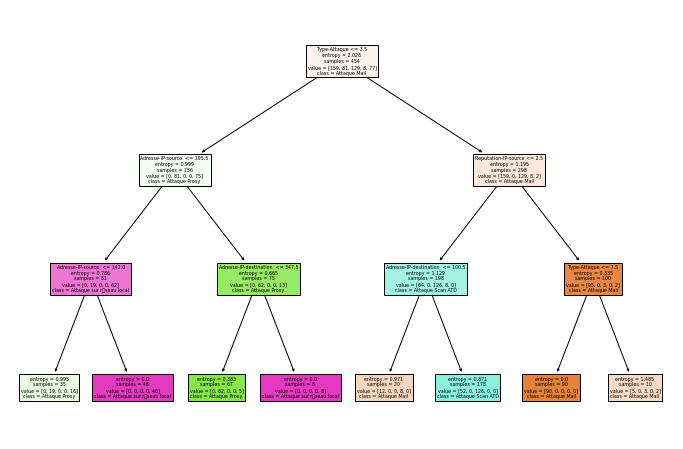

In [97]:
# Create the decision tree graph


fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(classifier, feature_names=X.columns, class_names=encoder.classes_, filled=True)